In [1]:
# =============================================================================
# Standard Libraries
# =============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # hide warning

# =============================================================================
# Scikit-learn for Preprocessing, Model Selection, and Metrics
# =============================================================================
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    precision_recall_curve, 
    auc, 
    classification_report, 
    confusion_matrix,
    # Potentially roc_auc_score if comparing with binary classification from errors
)

# =============================================================================
# TensorFlow / Keras for Autoencoder
# =============================================================================
import tensorflow as tf # Good practice to import tf itself
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam # Explicitly import optimizer

2025-06-01 05:48:49.478152: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748756929.493013  197697 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748756929.497287  197697 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748756929.509362  197697 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748756929.509383  197697 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1748756929.509385  197697 computation_placer.cc:177] computation placer alr

In [2]:
%pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.8/644.8 MB 46.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 142.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 174.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 151.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 149.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 158.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Credit Card Fraud dataset loaded successfully.
--------------------------------------------------
First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



--------------------------------------------------
Dataset Shape (rows, columns): (284807, 31)
--------------------------------------------------
Class distribution (0: Legitimate, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Proportion of total:


,Proportion,proportion
0,0,0.998273
1,1,0.001727


--------------------------------------------------


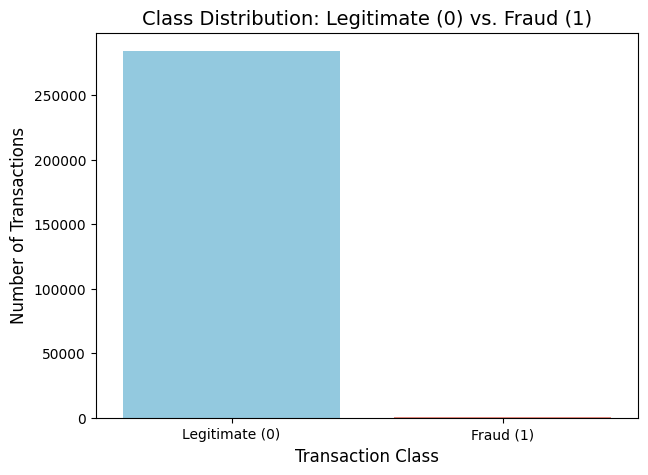

In [2]:
# Define the path to the dataset
DATA_PATH = "creditcard.csv" 

try:
    df = pd.read_csv(DATA_PATH) 
    print("Credit Card Fraud dataset loaded successfully.")
    print("--------------------------------------------------")
    print("First 5 rows of the dataset:")
    display(df.head()) 
    print("\n--------------------------------------------------")
    print(f"Dataset Shape (rows, columns): {df.shape}") 
    print("--------------------------------------------------")
    print("Class distribution (0: Legitimate, 1: Fraud):")
    class_counts = df['Class'].value_counts() 
    class_proportion = df['Class'].value_counts(normalize=True) 
    print(class_counts)
    print("\nProportion of total:")
    display(class_proportion.reset_index().rename(
        columns={'index': 'Class_Label', 'Class': 'Proportion'} 
    ))
    print("--------------------------------------------------")
    
    plt.figure(figsize=(7, 5))
    custom_palette = {0: "skyblue", 1: "salmon"}
    sns.countplot(x='Class', data=df, hue='Class', palette=custom_palette, legend=False) 
    plt.title('Class Distribution: Legitimate (0) vs. Fraud (1)', fontsize=14)
    plt.xlabel('Transaction Class', fontsize=12)
    plt.ylabel('Number of Transactions', fontsize=12)
    plt.xticks([0, 1], ['Legitimate (0)', 'Fraud (1)']) 
    plt.show()
    
except FileNotFoundError:
    print(f"Error: '{DATA_PATH}' was not found. Please ensure the file is in the correct path relative to your notebook.")
    df = None

In [3]:
# Ensure df is loaded from Listing 8.1
if df is not None:
    df_proc = df.copy() # Work on a copy

    # Scale 'Amount' and 'Time' features using StandardScaler
    scaler = StandardScaler()
    df_proc['scaled_amount'] = scaler.fit_transform(df_proc['Amount'].values.reshape(-1, 1))
    df_proc['scaled_time'] = scaler.fit_transform(df_proc['Time'].values.reshape(-1, 1))
    
    # Drop the original, unscaled 'Time' and 'Amount' columns
    df_proc.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    # Optional: Reorder columns to move 'Class' to the end for convenience
    if 'Class' in df_proc.columns:
        # Ensure 'Class' is the last column
        cols = [col for col in df_proc.columns if col != 'Class'] + ['Class']
        df_proc = df_proc[cols]

    # Separate features (X) and the target variable (y)
    X = df_proc.drop('Class', axis=1)
    y = df_proc['Class']

    # Split data into training and testing sets (e.g., 70% train, 30% test)
    # stratify=y ensures class proportions are maintained in both splits.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print("Data preprocessing (scaling and splitting) completed.")
    print("--------------------------------------------------")
    print(f"Shape of X_train: {X_train.shape}, Shape of y_train: {y_train.shape}")
    print(f"Shape of X_test: {X_test.shape}, Shape of y_test: {y_test.shape}")
    print("--------------------------------------------------")
    print("Fraud proportion in y_train (original, imbalanced):")
    display(y_train.value_counts(normalize=True).reset_index().rename(
        columns={'index': 'Class_Label', 'Class': 'Class_Label'}))
    print("--------------------------------------------------")
    print("Fraud proportion in y_test (original, imbalanced):")
    display(y_test.value_counts(normalize=True).reset_index().rename(
        columns={'index': 'Class_Label', 'Class': 'Class_Label'}))
    print("--------------------------------------------------")
    
else:
    print("DataFrame 'df' was not loaded in Listing 8.1. Cannot proceed with preprocessing.")

Data preprocessing (scaling and splitting) completed.
--------------------------------------------------
Shape of X_train: (199364, 30), Shape of y_train: (199364,)
Shape of X_test: (85443, 30), Shape of y_test: (85443,)
--------------------------------------------------
Fraud proportion in y_train (original, imbalanced):


,Class_Label,proportion
0,0,0.998275
1,1,0.001725


--------------------------------------------------
Fraud proportion in y_test (original, imbalanced):


,Class_Label,proportion
0,0,0.998268
1,1,0.001732


--------------------------------------------------


In [4]:
# Ensure X_train, X_test, y_train, y_test are available from supervised learning section (Listing 8.2)
# X_train and X_test are already scaled.

# Create a training set for the autoencoder consisting of only legitimate transactions
X_train_autoencoder_legit = X_train[y_train == 0]
# We will use the full X_test for evaluating reconstruction errors later,
# and y_test to see how errors differ for legit vs. fraud.

print(f"Shape of X_train_autoencoder_legit (only legit for AE training): {X_train_autoencoder_legit.shape}")
print(f"Shape of X_test (all original test features, for AE prediction): {X_test.shape}")

Shape of X_train_autoencoder_legit (only legit for AE training): (199020, 30)
Shape of X_test (all original test features, for AE prediction): (85443, 30)


In [5]:
# Ensure X_train_autoencoder_legit is defined from Listing 8.9

input_dim = X_train_autoencoder_legit.shape[1]
encoding_dim = 14 # Example: can be tuned

# --- Input Layer ---
input_layer = Input(shape=(input_dim,), name="Input_Layer")

# --- Encoder ---
# Layer 1
encoded = Dense(encoding_dim * 2, name="Encoder_Dense_1")(input_layer)
encoded = BatchNormalization(name="Encoder_BN_1")(encoded)
encoded = LeakyReLU(alpha=0.1, name="Encoder_LeakyReLU_1")(encoded)

# Layer 2 (Bottleneck - Encoded Representation)
encoded_representation = Dense(encoding_dim, name="Encoded_Representation")(encoded) # A
encoded_output = BatchNormalization(name="Encoder_BN_Bottleneck")(encoded_representation) # BN before activation for bottleneck
encoded_output = LeakyReLU(alpha=0.1, name="Encoder_Output_LeakyReLU")(encoded_output) # Activation for bottleneck output

# --- Decoder ---
# Layer 1 (mirrors Encoder Layer 1 in reverse)
decoded = Dense(encoding_dim * 2, name="Decoder_Dense_1")(encoded_output)
decoded = BatchNormalization(name="Decoder_BN_1_Decoder")(decoded)
decoded = LeakyReLU(alpha=0.1, name="Decoder_LeakyReLU_1_Decoder")(decoded)

# Output Layer (reconstructs to original input dimension)
reconstructed_input = Dense(input_dim, activation='linear', name="Output_Reconstruction")(decoded) # B

# --- Autoencoder Model (Encoder + Decoder) ---
autoencoder_model = Model(inputs=input_layer, outputs=reconstructed_input)

# Compile the autoencoder
autoencoder_model.compile(optimizer=Adam(learning_rate=0.001), 
                          loss='mean_squared_error', 
                          metrics=['mae'])

print("Autoencoder architecture defined and compiled.")
autoencoder_model.summary() # This will print the model architecture table


Autoencoder architecture defined and compiled.


2025-06-01 05:49:06.078831: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_Dense_1 (Dense)         │ (None, 28)             │           868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_BN_1                    │ (None, 28)             │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_LeakyReLU_1 (LeakyReLU) │ (None, 28)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoded_Representation (Dense)  │ (None, 14)             │           406 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_BN_Bottleneck           │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder_Output_LeakyReLU        │ (None, 14)             │             0 │
│ (LeakyReLU)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_Dense_1 (Dense)         │ (None, 28)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_BN_1_Decoder            │ (None, 28)             │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_LeakyReLU_1_Decoder     │ (None, 28)             │             0 │
│ (LeakyReLU)                     │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Reconstruction (Dense)   │ (None, 30)             │           870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,844 (11.11 KB)

 Trainable params: 2,704 (10.56 KB)

 Non-trainable params: 140 (560.00 B)


Training autoencoder on 159216 legitimate samples, validating on 39804 legitimate samples...
Epoch 1/30
622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8145 - mae: 0.6087 - val_loss: 0.3383 - val_mae: 0.4015
Epoch 2/30
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3428 - mae: 0.3919 - val_loss: 0.2396 - val_mae: 0.3319
Epoch 3/30
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2662 - mae: 0.3349 - val_loss: 0.1940 - val_mae: 0.2969
Epoch 4/30
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2308 - mae: 0.3048 - val_loss: 0.1651 - val_mae: 0.2713
Epoch 5/30
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1888 - mae: 0.2834 - val_loss: 0.1473 - val_mae: 0.2553
Epoch 6/30
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1633 - mae: 0.2677 - val_loss: 0.1366 - val_mae: 0.2440
Epoch 7/30
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1654 - mae: 0.2552 - val_loss: 0.1218 - val_mae: 0.2246
Epoch 8/30
622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1546 - mae: 0.2476

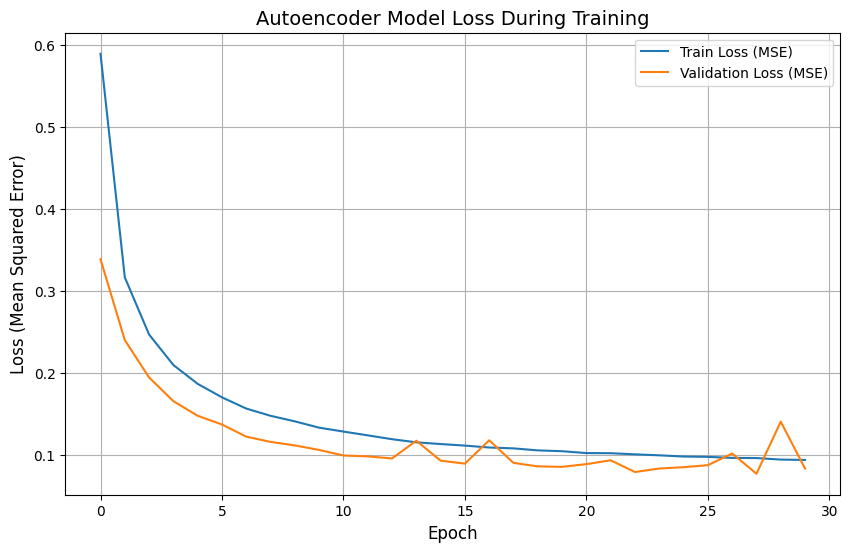

In [6]:
# Ensure X_train_autoencoder_legit is available from Listing 8.9

# Splitting legitimate training data (X_train_autoencoder_legit) for AE's own validation during training
X_train_ae_actual_fit, X_val_ae_actual_fit = train_test_split(
    X_train_autoencoder_legit, test_size=0.2, random_state=42
) # A

num_epochs_ae = 30 
batch_size_ae = 256

# Callbacks
early_stopper_ae = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
# It's good practice to save the best model.
model_checkpoint_ae = ModelCheckpoint(
    'best_autoencoder_model_ch8.keras', monitor='val_loss', save_best_only=True, verbose=0 
)

print(f"\nTraining autoencoder on {X_train_ae_actual_fit.shape[0]} legitimate samples, validating on {X_val_ae_actual_fit.shape[0]} legitimate samples...")
history_ae = autoencoder_model.fit(
    X_train_ae_actual_fit, X_train_ae_actual_fit, # Input and Target are the same
    epochs=num_epochs_ae,
    batch_size=batch_size_ae,
    shuffle=True,
    validation_data=(X_val_ae_actual_fit, X_val_ae_actual_fit), # Using the split validation set
    callbacks=[early_stopper_ae, model_checkpoint_ae], # Include checkpointing
    verbose=1
).history

print("\nAutoencoder training completed.")

# Plot training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_ae['loss'], label='Train Loss (MSE)')
plt.plot(history_ae['val_loss'], label='Validation Loss (MSE)')
plt.title('Autoencoder Model Loss During Training', fontsize=14)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.xlabel('Epoch', fontsize=12); plt.legend(loc='upper right'); plt.grid(True); plt.show()

In [8]:

test_predictions = autoencoder_model.predict(X_test)
mse_test = np.mean(np.power(X_test - test_predictions, 2), axis=1)
mae_test = np.mean(np.abs(X_test - test_predictions), axis=1)

error_df = pd.DataFrame({'reconstruction_error_mse': mse_test,
                         'reconstruction_error_mae': mae_test,
                         'true_class': y_test}) # y_test contains the actual labels (0 or 1)

print("\nReconstruction errors calculated for the test set.")
display(error_df.head())
print("\nSummary statistics of reconstruction errors by true class:")
display(error_df.groupby('true_class').describe()[['reconstruction_error_mse', 'reconstruction_error_mae']])

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 842us/step

Reconstruction errors calculated for the test set.


,reconstruction_error_mse,reconstruction_error_mae,true_class
186882,0.130358,0.296143,0
165754,0.028979,0.124354,0
235285,0.068727,0.170102,0
101271,0.005552,0.059953,0
5832,0.017290,0.105218,0



Summary statistics of reconstruction errors by true class:


reconstruction_error_mse                                            \
                              count       mean        std       min       25%   
true_class                                                                      
0                           85295.0   0.077074   0.568153  0.003566  0.018935   
1                             148.0  15.064009  19.339530  0.017429  2.259998   

                                           reconstruction_error_mae            \
                 50%        75%        max                    count      mean   
true_class                                                                      
0           0.032464   0.061888  44.706151                  85295.0  0.163037   
1           6.490788  20.347400  62.745806                    148.0  2.082709   

                                                                        
                 std       min       25%       50%       75%       max  
true_class                                                              
0           0.116504  0.046140  0.104509  0.135259  0.187414  4.298402  
1           1.595075  0.104001  1.018328  1.707578  3.155833  5.633246

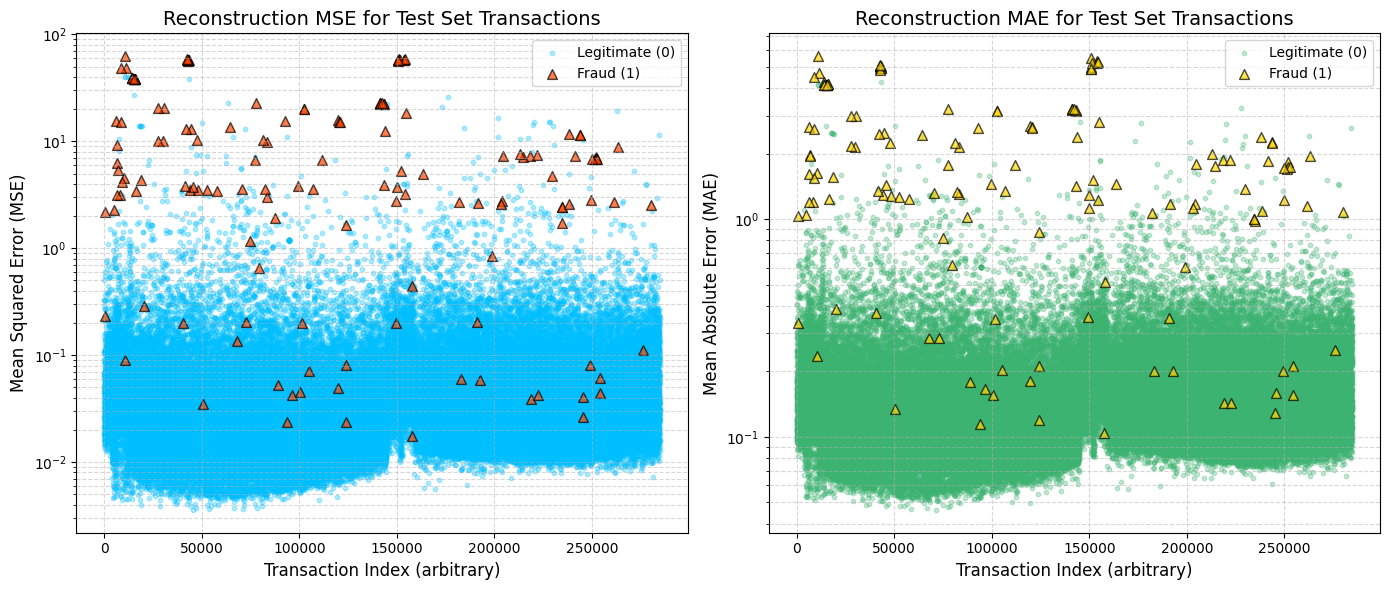

In [9]:

# We will plot the MSE. MAE can be plotted similarly.
# To avoid overplotting with too many points, we can take a random sample for visualization,
# or plot all if the dataset size is manageable for a scatter plot.
# For this dataset, plotting all might be dense, but let's try.
# Alternatively, plot only a random subsample of legitimate transactions and all fraud transactions.

df_legit_errors = error_df[error_df['true_class'] == 0]
df_fraud_errors = error_df[error_df['true_class'] == 1]

plt.figure(figsize=(14, 6))

# Plotting MSE
plt.subplot(1, 2, 1)
# Scatter plot for legitimate transactions
plt.scatter(df_legit_errors.index, df_legit_errors['reconstruction_error_mse'], 
            label='Legitimate (0)', marker='o', s=10, alpha=0.3, c='deepskyblue')
# Scatter plot for fraudulent transactions
plt.scatter(df_fraud_errors.index, df_fraud_errors['reconstruction_error_mse'], 
            label='Fraud (1)', marker='^', s=50, alpha=0.7, c='orangered', edgecolors='black') # A
plt.title('Reconstruction MSE for Test Set Transactions', fontsize=14)
plt.xlabel('Transaction Index (arbitrary)', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.yscale('log') # B. Use log scale to better visualize differences
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, which="both", ls="--", alpha=0.5)

# Plotting MAE (similar approach)
plt.subplot(1, 2, 2)
plt.scatter(df_legit_errors.index, df_legit_errors['reconstruction_error_mae'], 
            label='Legitimate (0)', marker='o', s=10, alpha=0.3, c='mediumseagreen')
plt.scatter(df_fraud_errors.index, df_fraud_errors['reconstruction_error_mae'], 
            label='Fraud (1)', marker='^', s=50, alpha=0.7, c='gold', edgecolors='black')
plt.title('Reconstruction MAE for Test Set Transactions', fontsize=14)
plt.xlabel('Transaction Index (arbitrary)', fontsize=12)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=12)
plt.yscale('log')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.tight_layout()
plt.show()